In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import cross_val_score
import pandas as pd

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data = data.dropna()

In [4]:
forecasting_regressor = LinearRegression()

In [42]:
# Split the data into features and target variable
X = data.drop(columns=['Program Name', 'Number of Dropout', 'Number of Graduates'])  # Features
y = data['Number of Graduates']  # Target variable

In [43]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Initialize base models
base_models = [
    ('linear', LinearRegression()),
    ('rf', RandomForestRegressor()),
    ('dt', DecisionTreeRegressor()),
    ('forecast', forecasting_regressor),
    ('knn', KNeighborsRegressor(n_neighbors=2)),
    ('svm', SVR(kernel='rbf')),
    ('xgb', XGBRegressor())
]

In [78]:
# Initialize stacking regressor using the base models and a meta-regressor
stacked_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

In [79]:
# Train the stacking model
stacked_model.fit(X_train, y_train)

StackingRegressor(estimators=[('linear', LinearRegression()),
                              ('rf', RandomForestRegressor()),
                              ('dt', DecisionTreeRegressor()),
                              ('forecast', LinearRegression()),
                              ('knn', KNeighborsRegressor(n_neighbors=2)),
                              ('svm', SVR()),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=N...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                  final_estimator=LinearRegression())

In [80]:
# Make predictions on the test set
predictions = stacked_model.predict(X_train)

In [81]:
# Evaluate the model (for example, using Mean Squared Error)
mse = mean_squared_error(y_train, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 87.65978884151755


In [82]:
stacked_model.score(X_train, y_train)

0.903065579294464

In [83]:
import pickle

# Train the stacking model (as before)
stacked_model.fit(X_train, y_train)

# Save the trained model to a file using pickle
with open('stacked_model_grad.pkl', 'wb') as file:
    pickle.dump(stacked_model, file)

In [84]:
# Load the saved model using pickle
with open('stacked_model_grad.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Now, 'loaded_model' contains your trained StackingRegressor model
# You can use it for predictions or further analysis

Enter the year (e.g., 2026.2027):  2022
Enter Program ID:  1
Enter Number of Enrollees:  1292


C:\Users\tolen\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\tolen\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\tolen\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\tolen\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\tolen\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\tolen\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: 

Predicted Value: 172.65165614427022


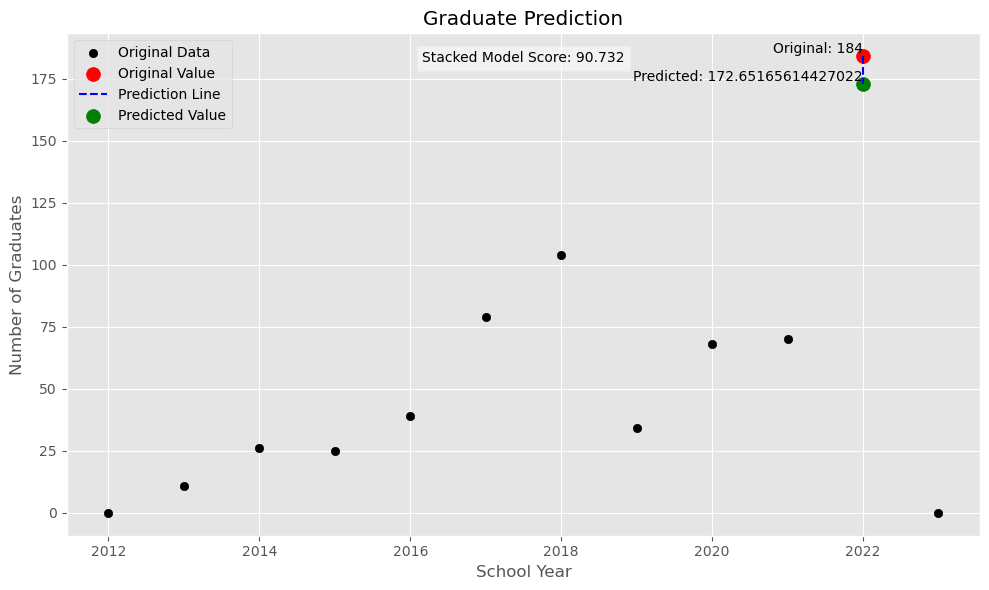

Do you want to make another prediction? (yes/no):  no


In [70]:
# import matplotlib.pyplot as plt

# Set the plot styles
plt.style.use('default')
plt.style.use('ggplot')

# Fit the stacked model with your training data (assuming you have X_train and y_train)
stacked_model.fit(X_train, y_train)

while True:
    # Get user input for prediction
    sy_input = float(input("Enter the year (e.g., 2026.2027): "))
    id_input = float(input("Enter Program ID: "))
    en_input = float(input("Enter Number of Enrollees: "))


    # Prepare the input data for prediction
    user_data = [[sy_input, id_input, en_input]]
    predictions = stacked_model.predict(user_data)

    # Calculate the score of the stacked model
    model_score = stacked_model.score(X_train, y_train) * 100   # Replace X_test and y_test with your test data

    # Create a new figure for each prediction
    plt.figure(figsize=(10, 6))

    # Filter data for the inputted Program ID
    filtered_data = data[data['Program ID'] == id_input]

    # Plot the original data for the specific Program ID in a 2D scatter plot
    plt.scatter(filtered_data['School Year'], filtered_data['Number of Graduates'], color='black', label='Original Data')

    # Check if sy_input exists in the filtered data
    if sy_input in filtered_data['School Year'].values:
        # Add the original value as a red dot
        original_value = filtered_data[filtered_data['School Year'] == sy_input]
        plt.scatter(sy_input, original_value['Number of Graduates'].values[0], color='red', label='Original Value', marker='o', s=100)
        plt.text(sy_input, original_value['Number of Graduates'].values[0], f'Original: {original_value["Number of Graduates"].values[0]}', ha='right', va='bottom')

        # Add a line connecting the original data and the predicted value
        plt.plot([sy_input, sy_input], [original_value['Number of Graduates'].values[0], predictions[0]], color='blue', linestyle='--', label='Prediction Line')

    # Add the predicted value as a green dot
    plt.scatter(sy_input, predictions[0], color='green', label='Predicted Value', marker='o', s=100)
    plt.text(sy_input, predictions[0], f'Predicted: {predictions[0]}', ha='right', va='bottom')

    # Display the predicted value outside the plot
    print(f'Predicted Value: {predictions[0]}')

    plt.title('Graduate Prediction')
    plt.xlabel('School Year')
    plt.ylabel('Number of Graduates')

    # Display the stacked model score on the plot
    plt.text(0.5, 0.95, f'Stacked Model Score: {model_score:.3f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))

    # Add a legend to distinguish the original data, predicted value, and prediction line
    plt.legend()

    # Show the 2D plot
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Ask the user if they want to make another prediction
    another_prediction = input("Do you want to make another prediction? (yes/no): ")
    if another_prediction.lower() != 'yes':
        break


In [23]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for each model
param_grid = {
    'rf': {'n_estimators': [100, 300, 500],
           'max_depth': [None, 10, 20]},
    'dt': {'max_depth': [None, 5, 10, 15]},
    'forecast': {},  # Add hyperparameters for forecasting_regressor if any
    'knn': {'n_neighbors': [5, 7, 9, 11]},
    'xgb': {'max_depth': [3, 5, 7],
            'learning_rate': [0.1, 0.01, 0.001]}
}

# Perform GridSearchCV for each model
best_params = {}
for model_name, model in base_models:
    if model_name in param_grid:
        params = param_grid[model_name]
        if params:
            grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')
            grid_search.fit(X_train, y_train)  # Replace X_train, y_train with your data
            best_params[model_name] = grid_search.best_params_
            # Update the model with the best parameters
            model.set_params(**grid_search.best_params_)

# Print best parameters found for each model
for model_name, params in best_params.items():
    print(f"Best parameters for {model_name}: {params}")

Best parameters for rf: {'max_depth': 10, 'n_estimators': 100}
Best parameters for dt: {'max_depth': 5}
Best parameters for knn: {'n_neighbors': 5}
Best parameters for xgb: {'learning_rate': 0.1, 'max_depth': 3}
